In [1]:
import numpy as np, plottools as pl, healpy as hp, binning as bn, analysis as ana, tools_qrec, curvedsky as cs, pickle, local, tools_cmb, tools_cib, warnings
from matplotlib.pyplot import *
warnings.filterwarnings("ignore")

In [2]:
def calc_std(wind,cn,mb):
    aobj = local.init_analysis(freq='smica',dtype='full',wind='L'+wind,fltr='cinv')
    qobj = tools_qrec.init_quad(aobj.snmax,ids=local.ids,rlz=aobj.rlz,stag=aobj.stag,qtypes=['ilens'],rlmin=100,rlmax=2048)
    iobj = tools_cib.init_cib(wind=wind)
    xobj = tools_qrec.cross(qobj['ilens'],iobj)
    __, vcb, __, __ = tools_qrec.binned_spec(mb,aobj,qobj,xobj,cn)
    return vcb

#### ilens x lens

In [3]:
mb = bn.multipole_binning(20,lmin=2,lmax=2000)
v40a = calc_std('G40',3,mb)
v60a = calc_std('G60',3,mb)

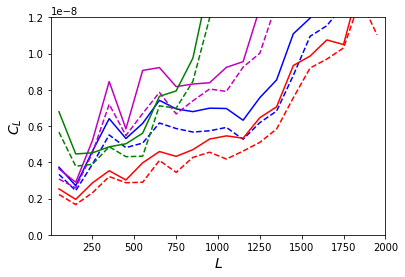

In [4]:
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=0,ymax=1.2e-8)
for q, c in zip(['TB','EB','BB','MV'],['b','m','g','r']):
    plot(mb.bc,v40a[q],color=c)
    plot(mb.bc,v60a[q],color=c,ls='--')

In [5]:
mb = bn.multipole_binning(10,lmin=8,lmax=400)
v40b = calc_std('G40',3,mb)
v60b = calc_std('G60',3,mb)

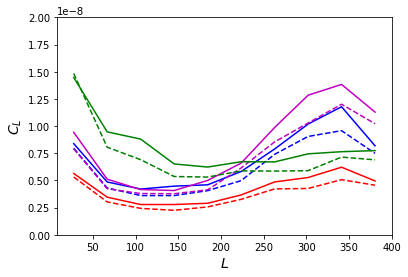

In [9]:
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=0,ymax=2e-8)
for q, c in zip(['TB','EB','BB','MV'],['b','m','g','r']):
    plot(mb.bc,v40b[q],color=c)
    plot(mb.bc,v60b[q],color=c,ls='--')

#### ilens x cib

In [7]:
mb = bn.multipole_binning(10,lmin=8,lmax=400)
v40c = calc_std('G40',5,mb)
v60c = calc_std('G60',5,mb)

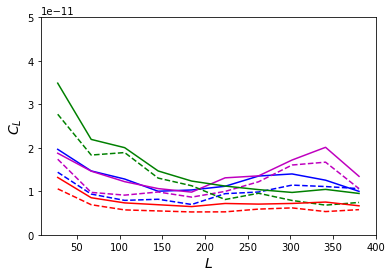

In [10]:
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=0,ymax=5e-11)
for q, c in zip(['TB','EB','BB','MV'],['b','m','g','r']):
    plot(mb.bc,v40c[q],color=c)
    plot(mb.bc,v60c[q],color=c,ls='--')